In [241]:
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.constants as const

In [242]:
def n(r1, r2, r3):
    return 2/(r1*r2*r3)

In [243]:
def E_kin(n, r1, r2, r3):
    return (3*const.Planck**2)/(10*const.m_e) * (3/(8*np.pi))**(2/3) * (n(r1,r2,r3)**(5/3))

In [244]:
def Potential_Energy(n, Vext, r1, r2, r3):
    return n(r1,r2,r3)(const.e * Vext(r1,r2,r3))+const.e**2/2 * const.e

In [245]:
def second_derivative(f, x, h=1e-5):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

In [246]:
def Thomas_Fermi_Equation(chi_before, chi_after, chi_current, r, h):
    """
    Finite difference formula for d²χ/dr² = χ^(3/2)/√r
    Returns new value of chi at position r
    """
    # RHS of the ODE
    rhs = max(chi_current, 0)**(3/2) / np.sqrt(max(r, 1e-10))
    # Rearrange finite difference: chi = (chi_before + chi_after - h²×RHS) / 2
    return (chi_before + chi_after - h**2 * rhs) / 2

In [247]:
initial_value = 20
list_r = np.linspace(0,5,100)
chi = np.zeros(100)+initial_value
chi[0] = 1

In [248]:
def solve_numerically(list_r, chi, max_iter=10000, tol=1e-6, fixed_indices=None):
    """
    Solve d^2 chi / dr^2 = chi^(3/2) / sqrt(r) using iteration
    Boundary conditions: chi[0] = 1, chi[-1] = 0
    
    Parameters:
    -----------
    fixed_indices : array-like, optional
        Indices where chi should remain fixed (not updated during iteration)
    """
    n = len(list_r)
    h = list_r[1] - list_r[0]  # step size
    
    # By default, fix the first and last points
    if fixed_indices is None:
        fixed_indices = [0, n-1]
    else:
        # Make sure boundaries are always included
        fixed_indices = list(set(fixed_indices) | {0, n-1})
    
    for iteration in range(max_iter):
        max_change = 0.0
        
        # Update all points except those that are fixed
        for i in range(1, n-1):
            if i in fixed_indices:
                continue  # Skip fixed boundary points
            
            r = list_r[i]
            chi_before = chi[i-1]
            chi_after = chi[i+1]
            chi_current = chi[i]
            
            # Calculate new value using your Thomas_Fermi_Equation function
            chi_new = Thomas_Fermi_Equation(chi_before, chi_after, chi_current, r, h)
            
            # Track convergence
            change = abs(chi_new - chi[i])
            max_change = max(max_change, change)
            
            chi[i] = chi_new
        
        # Check for convergence
        if max_change < tol:
            print(f"Converged after {iteration+1} iterations")
            return chi
        
        if (iteration + 1) % 1000 == 0:
            print(f"Iteration {iteration+1}: max_change = {max_change:.2e}")
    
    print(f"Max iterations reached. Final max_change = {max_change:.2e}")
    return chi

### Aufgabe 1: a)

In [249]:
chi_a = chi.copy()
chi_a[-1] = 0

Iteration 1000: max_change = 1.22e-03
Iteration 2000: max_change = 1.05e-04
Iteration 2000: max_change = 1.05e-04
Iteration 3000: max_change = 1.24e-05
Iteration 3000: max_change = 1.24e-05
Iteration 4000: max_change = 1.53e-06
Converged after 4205 iterations
Iteration 4000: max_change = 1.53e-06
Converged after 4205 iterations


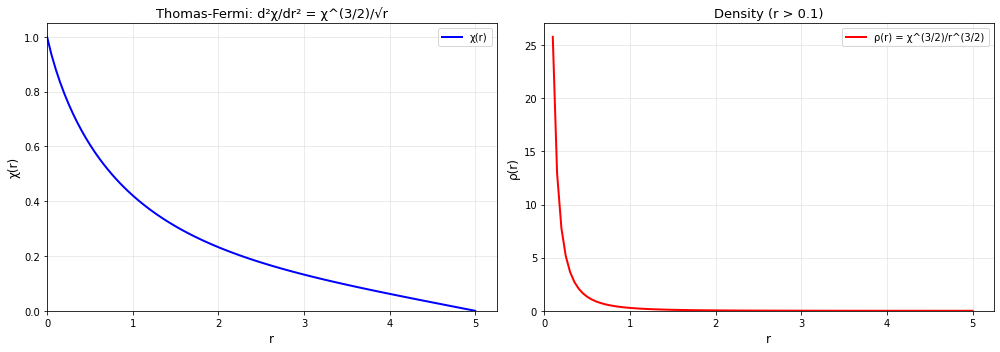

In [250]:
# Solve the Thomas-Fermi equation
chi_solution = solve_numerically(list_r, chi_a.copy())

# Calculate density: rho = chi^(3/2) / r^(3/2)
rho = chi_solution**(3/2) / (list_r + 1e-10)**(3/2)

# For plotting density, skip points very close to r=0 to avoid spurious peaks
mask = list_r > 0.1  # Only plot density for r > 0.1

# Plot chi and density
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14, 5))

# Plot chi
ax1.plot(list_r, chi_solution, 'b-', linewidth=2, label='χ(r)')
ax1.set_xlabel('r', fontsize=12)
ax1.set_ylabel('χ(r)', fontsize=12)
ax1.set_title('Thomas-Fermi: d²χ/dr² = χ^(3/2)/√r', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)

# Plot density (trimmed near r=0)
ax2.plot(list_r[mask], rho[mask], 'r-', linewidth=2, label='ρ(r) = χ^(3/2)/r^(3/2)')
ax2.set_xlabel('r', fontsize=12)
ax2.set_ylabel('ρ(r)', fontsize=12)
ax2.set_title('Density (r > 0.1)', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

pyplot.tight_layout()
pyplot.show()

### Aufgabe 1 b)

### I decided for xo = 2.5. But I didnt know if it is supposed to look like this

Iteration 1000: max_change = 3.83e-03
Iteration 2000: max_change = 5.59e-04
Iteration 2000: max_change = 5.59e-04
Iteration 3000: max_change = 1.10e-04
Iteration 3000: max_change = 1.10e-04
Iteration 4000: max_change = 2.36e-05
Iteration 4000: max_change = 2.36e-05
Iteration 5000: max_change = 5.13e-06
Iteration 5000: max_change = 5.13e-06
Iteration 6000: max_change = 1.12e-06
Converged after 6076 iterations
Iteration 6000: max_change = 1.12e-06
Converged after 6076 iterations


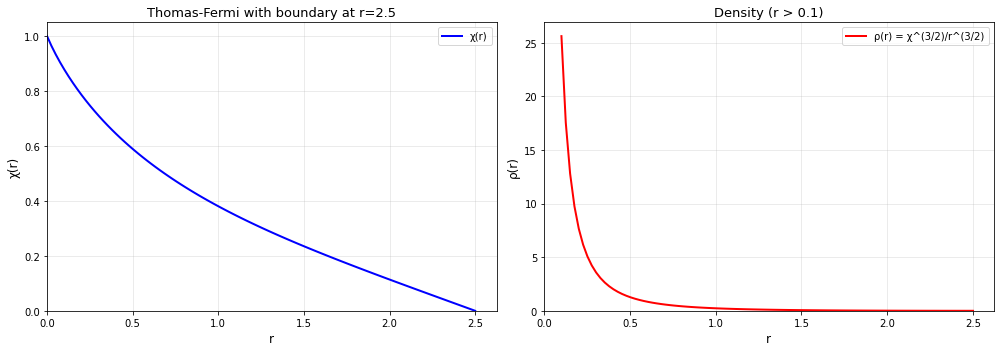

In [251]:
chi_b = chi.copy()

list_r_b = np.linspace(0,2.5,100)
chi_b[-1] = 0

# Solve the Thomas-Fermi equation, keeping the point at r=2.5 fixed
chi_solution = solve_numerically(list_r_b, chi_b.copy(), fixed_indices=[-1])

# Calculate density: rho = chi^(3/2) / r^(3/2)
rho = chi_solution**(3/2) / (list_r_b + 1e-10)**(3/2)

# For plotting density, skip points very close to r=0 to avoid spurious peaks
mask = list_r_b > 0.1  # Only plot density for r > 0.1

# Plot chi and density
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14, 5))

# Plot chi
ax1.plot(list_r_b, chi_solution, 'b-', linewidth=2, label='χ(r)')
ax1.set_xlabel('r', fontsize=12)
ax1.set_ylabel('χ(r)', fontsize=12)
ax1.set_title('Thomas-Fermi with boundary at r=2.5', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)

# Plot density (trimmed near r=0)
ax2.plot(list_r_b[mask], rho[mask], 'r-', linewidth=2, label='ρ(r) = χ^(3/2)/r^(3/2)')
ax2.set_xlabel('r', fontsize=12)
ax2.set_ylabel('ρ(r)', fontsize=12)
ax2.set_title('Density (r > 0.1)', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

pyplot.tight_layout()
pyplot.show()

### Or like this:

Iteration 1000: max_change = 8.66e-05
Converged after 1720 iterations
Converged after 1720 iterations


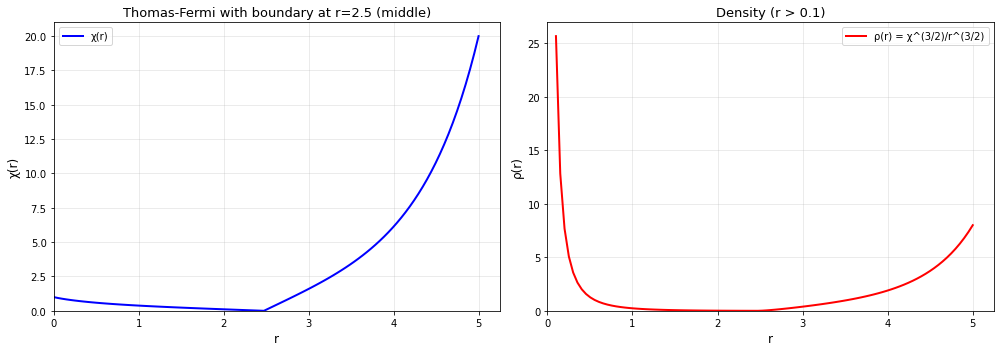

In [252]:
chi_b = chi.copy()

list_r_b = np.linspace(0,5,100)
chi_b[49] = 0

# Solve the Thomas-Fermi equation, keeping the point at r=2.5 fixed
chi_solution = solve_numerically(list_r_b, chi_b.copy(), fixed_indices=[49])

# Calculate density: rho = chi^(3/2) / r^(3/2)
rho = chi_solution**(3/2) / (list_r_b + 1e-10)**(3/2)

# For plotting density, skip points very close to r=0 to avoid spurious peaks
mask = list_r_b > 0.1  # Only plot density for r > 0.1

# Plot chi and density
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14, 5))

# Plot chi
ax1.plot(list_r_b, chi_solution, 'b-', linewidth=2, label='χ(r)')
ax1.set_xlabel('r', fontsize=12)
ax1.set_ylabel('χ(r)', fontsize=12)
ax1.set_title('Thomas-Fermi with boundary at r=2.5 (middle)', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)

# Plot density (trimmed near r=0)
ax2.plot(list_r_b[mask], rho[mask], 'r-', linewidth=2, label='ρ(r) = χ^(3/2)/r^(3/2)')
ax2.set_xlabel('r', fontsize=12)
ax2.set_ylabel('ρ(r)', fontsize=12)
ax2.set_title('Density (r > 0.1)', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

pyplot.tight_layout()
pyplot.show()

### Aufgabe 1 c)

Iteration 1000: max_change = 4.38e-05
Converged after 1517 iterations


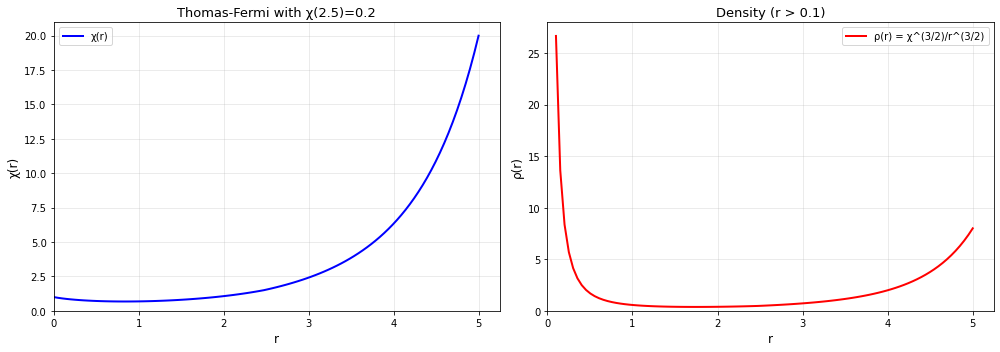

In [257]:
chi_c = chi.copy()

list_r_c = np.linspace(0,5,100)
chi_c[49] = 1.5

# Solve the Thomas-Fermi equation, keeping the point at r=2.5 fixed
chi_solution = solve_numerically(list_r_c, chi_c.copy(), fixed_indices=[49])

# Calculate density: rho = chi^(3/2) / r^(3/2)
rho = chi_solution**(3/2) / (list_r_c + 1e-10)**(3/2)

# For plotting density, skip points very close to r=0 to avoid spurious peaks
mask = list_r_c > 0.1  # Only plot density for r > 0.1

# Plot chi and density
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14, 5))

# Plot chi
ax1.plot(list_r_c, chi_solution, 'b-', linewidth=2, label='χ(r)')
ax1.set_xlabel('r', fontsize=12)
ax1.set_ylabel('χ(r)', fontsize=12)
ax1.set_title('Thomas-Fermi with χ(2.5)=0.2', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)

# Plot density (trimmed near r=0)
ax2.plot(list_r_c[mask], rho[mask], 'r-', linewidth=2, label='ρ(r) = χ^(3/2)/r^(3/2)')
ax2.set_xlabel('r', fontsize=12)
ax2.set_ylabel('ρ(r)', fontsize=12)
ax2.set_title('Density (r > 0.1)', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

pyplot.tight_layout()
pyplot.show()

### Aufgabe 1.2:

- N/Z < 1 corresponds to b), where the atom is "positive" and thus the electron density should, when looked from far away, be 0
- N/Z = 1 corresponds to a), where the atom is neutral, meaning that looked from infinitely far away, it should look like the electrons are shielded through the positive charge of the atom
- N/Z > 1 corresponds to c), where the atom is "negative" meaning even from far away you can see the electron density being significant
  

### Aufgabe 1.3
This does not hold true in real materials because as more and more electrons get crammed, things like Pauli principle or the form of the orbitals play a significant role where the potential would then be dominated by these effects. Because we model the electrons as a liquid it ignores the quantum nature of the electrons. 

## Aufgabe 1.4
- Hartree-Fock: Fock term, it describes the interactions and effects of the different orbitals
- DFT: exchange correlation term, describes everything relating to the exchange interaction 